# Importing libraries

In [1]:
import pandas as pd
import geopandas as gp
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import duckdb as db

# Connecting to duckdb database
* Install and load **SPATIAL** extension to display **gps table**
* Showing all tables


In [2]:
con = db.connect("../cyberdeck.db") 
con.install_extension("spatial")
con.load_extension("spatial")

In [3]:
con.sql("show tables;")

┌────────────┐
│    name    │
│  varchar   │
├────────────┤
│ barometric │
│ cpu        │
│ device     │
│ gps        │
└────────────┘

In [4]:
con.sql("select * from device;")

┌───────────┬─────────────┬──────────────┐
│ device_id │ device_name │ date_created │
│   int8    │   varchar   │  timestamp   │
├───────────┴─────────────┴──────────────┤
│                 0 rows                 │
└────────────────────────────────────────┘

In [5]:
con.sql("select * from barometric;")

┌───────────┬───────────────┬────────────────────┬────────────────────┐
│ device_id │ temperature_c │    pressure_hpa    │     altitude_m     │
│   int8    │    double     │       double       │       double       │
├───────────┼───────────────┼────────────────────┼────────────────────┤
│      NULL │ 27.8455078125 │ 1010.9668709992525 │  50.27470127404733 │
│      NULL │ 27.8748046875 │  1010.933108571557 │ 50.247412445274065 │
│      NULL │ 27.9412109375 │ 1010.9464616310931 │  50.19226427378505 │
│      NULL │  27.955859375 │ 1010.9619420751385 │   50.2097829196821 │
│      NULL │   27.96328125 │ 1010.9355321054054 │  50.33753813295399 │
│      NULL │   27.87734375 │ 1010.9497155967625 │  50.05872910177986 │
│      NULL │ 27.8724609375 │ 1010.9563171747362 │  50.26116973303033 │
│      NULL │  27.884765625 │ 1010.9402827312987 │  50.30462319193966 │
│      NULL │  27.867578125 │ 1010.9448671314253 │ 50.423832693252834 │
│      NULL │ 27.8552734375 │ 1010.9290154550876 │  50.323619471

In [6]:
con.sql("select * from cpu;")

┌───────────┬──────────┬─────────────────┬──────────────────────┐
│ device_id │ cpu_load │ memory_usage_mb │ memory_usage_percent │
│   int8    │  double  │     double      │       varchar        │
├───────────┼──────────┼─────────────────┼──────────────────────┤
│      NULL │     69.0 │            0.22 │ 420/1900             │
│      NULL │     67.0 │            0.28 │ 422/1900             │
│      NULL │     70.0 │            0.28 │ 424/1900             │
│      NULL │     67.0 │            0.34 │ 425/1900             │
│      NULL │     68.0 │            0.34 │ 427/1900             │
│      NULL │     67.0 │            0.52 │ 427/1900             │
│      NULL │     67.0 │            0.48 │ 426/1900             │
│      NULL │     68.0 │            0.48 │ 426/1900             │
│      NULL │     67.0 │            0.44 │ 425/1900             │
│      NULL │     67.0 │            0.44 │ 426/1900             │
│        ·  │       ·  │              ·  │    ·                 │
│        ·

In [7]:
con.sql("select * from gps;")

┌───────────┬─────────────────────┬───────────┬─────────────────────┬──────────┬────────────────────┬──────────────────┐
│ device_id │      datetime       │ longitude │ longitude_direction │ latitude │ latitude_direction │ lon_lat_geometry │
│   int8    │      timestamp      │  double   │       varchar       │  double  │      varchar       │     geometry     │
├───────────┼─────────────────────┼───────────┼─────────────────────┼──────────┼────────────────────┼──────────────────┤
│      NULL │ 2025-09-12 00:47:37 │       0.0 │ NULL                │      0.0 │ NULL               │ POINT (0 0)      │
│      NULL │ 2025-09-12 00:47:53 │       0.0 │ NULL                │      0.0 │ NULL               │ POINT (0 0)      │
│      NULL │ 2025-09-12 00:48:05 │       0.0 │ NULL                │      0.0 │ NULL               │ POINT (0 0)      │
│      NULL │ 2025-09-12 00:48:23 │       0.0 │ NULL                │      0.0 │ NULL               │ POINT (0 0)      │
│      NULL │ 2025-09-12 00:48:3

# Converting **gps** table to **Dataframe**
* Convert **lon_lat_geometry** to **Geopandas Dataframe**
* Filter **non zero** lat/lon coordinates

In [8]:
gps = con.sql("select datetime, longitude, longitude_direction, latitude, latitude_direction, ST_AsText(lon_lat_geometry) as lon_lat_geometry from gps;")
df_gps = gps.df()

In [9]:
print(type(df_gps))
df_gps["lon_lat_geometry"]

<class 'pandas.core.frame.DataFrame'>


0      POINT (0 0)
1      POINT (0 0)
2      POINT (0 0)
3      POINT (0 0)
4      POINT (0 0)
          ...     
675    POINT (0 0)
676    POINT (0 0)
677    POINT (0 0)
678    POINT (0 0)
679    POINT (0 0)
Name: lon_lat_geometry, Length: 680, dtype: object

In [10]:
#df_gps["lon_lat_geometry"] = df_gps["lon_lat_geometry"].apply(wkt.loads)
df_gps["lon_lat_geometry"] = gp.GeoSeries.from_wkt(df_gps["lon_lat_geometry"])
gdf_gps = gp.GeoDataFrame(df_gps, geometry="lon_lat_geometry", crs="EPSG:4326")
gdf_gps

,datetime,longitude,longitude_direction,latitude,latitude_direction,lon_lat_geometry
0,2025-09-12 00:47:37,0.0,None,0.0,None,POINT (0 0)
1,2025-09-12 00:47:53,0.0,None,0.0,None,POINT (0 0)
2,2025-09-12 00:48:05,0.0,None,0.0,None,POINT (0 0)
3,2025-09-12 00:48:23,0.0,None,0.0,None,POINT (0 0)
4,2025-09-12 00:48:37,0.0,None,0.0,None,POINT (0 0)
...,...,...,...,...,...,...
675,2025-09-13 21:57:04,0.0,None,0.0,None,POINT (0 0)
676,2025-09-13 21:57:20,0.0,None,0.0,None,POINT (0 0)
677,2025-09-13 21:57:41,0.0,None,0.0,None,POINT (0 0)
678,2025-09-13 21:58:08,0.0,None,0.0,None,POINT (0 0)


In [11]:
# confirming CRS (coordinate reference system) values
# and dataframe values
print(gdf_gps.crs)
type(gdf_gps)

EPSG:4326


geopandas.geodataframe.GeoDataFrame

In [12]:
# filtering non zero values to plot onto map
# putting that on new geopandas dataframe
condition = (gdf_gps["longitude"] != 0) & (gdf_gps["latitude"] != 0)
non_zero = gdf_gps[condition]
non_zero

,datetime,longitude,longitude_direction,latitude,latitude_direction,lon_lat_geometry
320,2025-09-13 16:17:40,-79.514283,W,43.671298,N,POINT (-79.51428 43.6713)
321,2025-09-13 16:18:02,-79.514282,W,43.671303,N,POINT (-79.51428 43.6713)
322,2025-09-13 16:18:26,-79.514287,W,43.671307,N,POINT (-79.51429 43.67131)
323,2025-09-13 16:18:46,-79.514287,W,43.671307,N,POINT (-79.51429 43.67131)
324,2025-09-13 16:19:08,-79.514277,W,43.671308,N,POINT (-79.51428 43.67131)
...,...,...,...,...,...,...
475,2025-09-13 17:44:15,-79.505120,W,43.708012,N,POINT (-79.50512 43.70801)
476,2025-09-13 17:44:30,-79.505135,W,43.708102,N,POINT (-79.50514 43.7081)
477,2025-09-13 17:44:57,-79.505153,W,43.708195,N,POINT (-79.50515 43.7082)
478,2025-09-13 17:45:08,-79.505172,W,43.708288,N,POINT (-79.50517 43.70829)


In [13]:
gps_map = gp.read_file("./parks-wgs84")
print(gps_map.crs)
gps_map

GEOGCS["WGS 84",DATUM["World Geodetic System 1984 [EPSG ID 6326]",SPHEROID["WGS 84 [EPSG ID 7030]",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Decimal_Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,OBJECTID,GEO_ID,TYPE_DESC,SCODE_NAME,LCODE_NAME,NAME,geometry
0,180,180.0,CGSP,None,3017,CITY WIDE OPEN SPACE,"POLYGON ((-79.22672 43.80698, -79.2266 43.8069..."
1,193,193.0,CGSP,None,3050,PUBLIC ACCESS PROPERTY,"POLYGON ((-79.20123 43.80354, -79.20116 43.803..."
2,325,325.0,CGSP,None,3017,CITY WIDE OPEN SPACE,"POLYGON ((-79.2417 43.7796, -79.24294 43.77826..."
3,327,327.0,CGSP,None,3024,EAST HIGHLAND CREEK WATERCOURSE,"POLYGON ((-79.23614 43.77942, -79.23556 43.779..."
4,328,328.0,CGSP,None,3017,CITY WIDE OPEN SPACE,"POLYGON ((-79.41225 43.77916, -79.41222 43.779..."
...,...,...,...,...,...,...,...
3269,4306630,109.0,CGSP,None,3026,CITY WIDE OPEN SPACE,"POLYGON ((-79.16681 43.82439, -79.1654 43.8231..."
3270,4306631,117.0,CGSP,None,3026,CITY WIDE OPEN SPACE,"POLYGON ((-79.16478 43.82095, -79.16521 43.820..."
3271,4306633,196.0,CGSP,None,3026,CITY WIDE OPEN SPACE,"POLYGON ((-79.15168 43.80284, -79.1516 43.8026..."
3272,4306634,579.0,CGSP,None,3026,CITY WIDE OPEN SPACE,"POLYGON ((-79.25633 43.71383, -79.2567 43.7132..."


In [14]:
james_garden = gps_map[gps_map["NAME"] == "JAMES GARDENS"]
james_garden

,OBJECTID,GEO_ID,TYPE_DESC,SCODE_NAME,LCODE_NAME,NAME,geometry
1908,4305157,539.0,CGSP,539,539,JAMES GARDENS,"POLYGON ((-79.51514 43.67167, -79.51506 43.671..."


# Plotting coordinates 

## Option 1: matplotlib
* More specific onto regions 

-79.51746115 43.66970926 -79.51305667 43.67187585


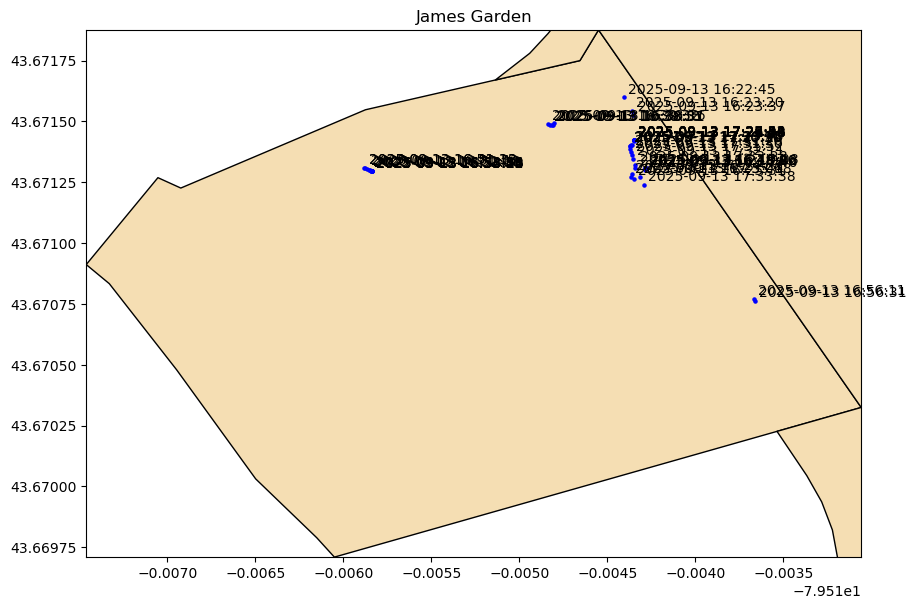

In [15]:
# region boundary 
minx, miny, maxx, maxy = james_garden.total_bounds
print(minx, miny, maxx, maxy)

fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("James Garden")

# zooming into region
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

gps_map.plot(ax=ax, facecolor="wheat", edgecolor="black", linewidth=1)
non_zero.plot(ax=ax, color="blue", markersize=5)

for idx, row in gdf_gps.iterrows():
    ax.annotate(text=row["datetime"],
                xy=(row.longitude,row.latitude),
                xytext=(3,3),
                textcoords="offset points",
                fontsize=10,
                color="black"
               )


## Option 2: Geopandas Explore
* Interactive and automarks coordinates
* For overall views

In [16]:
non_zero.explore(zoom_start=13)